In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DM2/dataset/df_final_no_outliers.csv")

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df.columns

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'speechiness',
       'start_of_fade_out', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'track_number', 'valence',
       'Artists_popularity', 'Artists_followers', 'broad_genre', 'artists',
       'is_collaboration', 'total_tracks_all_artists', 'is_popular',
       'album_release_year'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#Using the knowledge obtained in Module 3

selected_features_multi = ['Artists_popularity', 'Artists_followers', 'total_tracks_all_artists', 'album_release_year', 'album_total_tracks', 'track_popularity','loudness', 'acousticness', 'tempo', 'speechiness']
selected_features_bin = ['Artists_popularity', 'Artists_followers', 'total_tracks_all_artists', 'album_release_year', 'album_total_tracks', 'genre', 'loudness', 'acousticness', 'tempo', 'speechiness']

In [ ]:
genre_mapping = {
    # Electronic/Dance
    'club': 'Electronic/Dance', 'minimal-techno': 'Electronic/Dance', 'drum-and-bass': 'Electronic/Dance',
    'idm': 'Electronic/Dance', 'dubstep': 'Electronic/Dance', 'progressive-house': 'Electronic/Dance',
    'chicago-house': 'Electronic/Dance', 'electronic': 'Electronic/Dance', 'trance': 'Electronic/Dance',
    'edm': 'Electronic/Dance', 'deep-house': 'Electronic/Dance', 'techno': 'Electronic/Dance',
    'garage': 'Electronic/Dance', 'breakbeat': 'Electronic/Dance', 'synth-pop': 'Electronic/Dance',
    'hardstyle': 'Electronic/Dance', 'electro': 'Electronic/Dance', 'house': 'Electronic/Dance',

    # Pop
    'pop': 'Pop', 'indie-pop': 'Pop', 'j-pop': 'Pop', 'k-pop': 'Pop',
    'mandopop': 'Pop', 'cantopop': 'Pop', 'british': 'Pop',
    'power-pop': 'Pop', 'pop-film': 'Pop', 'kids': 'Pop', 'j-dance': 'Pop',
    'r-n-b': 'Pop',

    # Rock/Alternative
    'punk-rock': 'Rock/Alternative', 'emo': 'Rock/Alternative',
    'grunge': 'Rock/Alternative', 'industrial': 'Rock/Alternative',
    'alternative': 'Rock/Alternative', 'psych-rock': 'Rock/Alternative',
    'alt-rock': 'Rock/Alternative', 'hard-rock': 'Rock/Alternative',
    'rock': 'Rock/Alternative', 'rockabilly': 'Rock/Alternative',
    'metal': 'Rock/Alternative', 'heavy-metal': 'Rock/Alternative',
    'black-metal': 'Rock/Alternative', 'death-metal': 'Rock/Alternative',
    'hardcore': 'Rock/Alternative', 'metalcore': 'Rock/Alternative',
    'rock-n-roll': 'Rock/Alternative', 'goth': 'Rock/Alternative',
    'garage': 'Rock/Alternative', 'grindcore': 'Rock/Alternative',
    'punk': 'Rock/Alternative', 'j-rock': 'Rock/Alternative',
    'ska': 'Rock/Alternative',

    # Hip-Hop/Rap
    'hip-hop': 'Hip-Hop/Rap', 'rap': 'Hip-Hop/Rap', 'reggaeton': 'Hip-Hop/Rap',
    'trip-hop': 'Hip-Hop/Rap', 'dancehall': 'Hip-Hop/Rap',

    # Classical/Instrumental
    'classical': 'Classical/Instrumental', 'opera': 'Classical/Instrumental',
    'piano': 'Classical/Instrumental', 'ambient': 'Classical/Instrumental',
    'songwriter': 'Classical/Instrumental', 'acoustic': 'Classical/Instrumental',
    'guitar': 'Classical/Instrumental',

    # Jazz/Blues/Soul
    'jazz': 'Jazz/Blues/Soul', 'blues': 'Jazz/Blues/Soul',
    'soul': 'Jazz/Blues/Soul', 'funk': 'Jazz/Blues/Soul',
    'gospel': 'Jazz/Blues/Soul', 'dub': 'Jazz/Blues/Soul',
    'r-n-b': 'Jazz/Blues/Soul',

    # Country/Folk/Traditional
    'country': 'Country/Folk/Traditional', 'bluegrass': 'Country/Folk/Traditional',
    'folk': 'Country/Folk/Traditional', 'honky-tonk': 'Country/Folk/Traditional',
    'brazil': 'Country/Folk/Traditional', 'pagode': 'Country/Folk/Traditional',
    'mpb': 'Country/Folk/Traditional', 'samba': 'Country/Folk/Traditional',
    'sertanejo': 'Country/Folk/Traditional', 'afrobeat': 'Country/Folk/Traditional',

    # Latin/World
    'latin': 'Latin/World', 'latino': 'Latin/World', 'spanish': 'Latin/World',
    'forro': 'Latin/World', 'tango': 'Latin/World', 'salsa': 'Latin/World',
    'world-music': 'Latin/World',

    # Children/Family
    'kids': 'Children/Family', 'children': 'Children/Family',
    'disney': 'Children/Family', 'comedy': 'Children/Family',
    'happy': 'Children/Family',

    # Asian Music
    'j-pop': 'Asian Music', 'j-rock': 'Asian Music', 'j-dance': 'Asian Music',
    'j-idol': 'Asian Music', 'anime': 'Asian Music', 'iranian': 'Asian Music',
    'indian': 'Asian Music', 'malay': 'Asian Music', 'turkish': 'Asian Music',

    # Reggae/Dub
    'reggae': 'Reggae/Dub', 'dub': 'Reggae/Dub', 'dancehall': 'Reggae/Dub',

    # Chill/Relaxation
    'chill': 'Chill/Relaxation', 'study': 'Chill/Relaxation',
    'sleep': 'Chill/Relaxation', 'new-age': 'Chill/Relaxation',
    'ambient': 'Chill/Relaxation', 'sad': 'Chill/Relaxation',

    # Dance/Disco
    'dance': 'Dance/Disco', 'disco': 'Dance/Disco',

    # Other/Niche
    'party': 'Other/Niche', 'romance': 'Other/Niche',
    'show-tunes': 'Other/Niche', 'detroit-techno': 'Other/Niche',
    'hardstyle': 'Other/Niche', 'psych-rock': 'Other/Niche',
    'industrial': 'Other/Niche', 'german': 'Other/Niche',
    'french': 'Other/Niche', 'swedish': 'Other/Niche',
    'comedy': 'Other/Niche', 'groove': 'Other/Niche', 'indie': 'Other/Niche'
}

In [ ]:
df['genre'].unique()

array(['german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'soul',
       'punk-rock', 'bluegrass', 'happy', 'drum-and-bass', 'idm',
       'alternative', 'emo', 'honky-tonk', 'industrial', 'j-dance',
       'grindcore', 'french', 'world-music', 'hard-rock', 'forro',
       'j-pop', 'children', 'j-rock', 'power-pop', 'pagode', 'jazz',
       'romance', 'study', 'funk', 'afrobeat', 'black-metal', 'grunge',
       'opera', 'show-tunes', 'heavy-metal', 'k-pop', 'progressive-house',
       'acoustic', 'anime', 'ambient', 'dubstep', 'iranian', 'songwriter',
       'synth-pop', 'chicago-house', 'kids', 'disco', 'blues', 'pop-film',
       'gospel', 'brazil', 'mandopop', 'swedish', 'tango', 'reggae',
       'piano', 'spanish', 'turkish', 'salsa', 'samba', 'electronic',
       'goth', 'dance', 'malay', 'death-metal', 'trance', 'indian',
       'country', 'hardstyle', 'mpb', 'electro', 'indie-pop', 'disney',
       'chill', 'j-idol', 'psych-rock', 'punk', 'guitar', 'dub', 'groove',
       

In [ ]:
original_genres = [
    'german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'soul',
    'punk-rock', 'bluegrass', 'happy', 'drum-and-bass', 'idm',
    'alternative', 'emo', 'honky-tonk', 'industrial', 'j-dance',
    'grindcore', 'french', 'world-music', 'hard-rock', 'forro',
    'j-pop', 'children', 'j-rock', 'power-pop', 'pagode', 'jazz',
    'romance', 'study', 'funk', 'afrobeat', 'black-metal', 'grunge',
    'opera', 'show-tunes', 'heavy-metal', 'k-pop', 'progressive-house',
    'acoustic', 'anime', 'ambient', 'dubstep', 'iranian', 'songwriter',
    'synth-pop', 'chicago-house', 'kids', 'disco', 'blues', 'pop-film',
    'gospel', 'brazil', 'mandopop', 'swedish', 'tango', 'reggae',
    'piano', 'spanish', 'turkish', 'salsa', 'samba', 'electronic',
    'goth', 'dance', 'malay', 'death-metal', 'trance', 'indian',
    'country', 'hardstyle', 'mpb', 'electro', 'indie-pop', 'disney',
    'chill', 'j-idol', 'psych-rock', 'punk', 'guitar', 'dub', 'groove',
    'hardcore', 'rockabilly', 'reggaeton', 'house', 'metalcore',
    'rock', 'dancehall', 'trip-hop', 'metal', 'folk', 'party',
    'breakbeat', 'sleep', 'detroit-techno', 'garage', 'indie',
    'sertanejo', 'sad', 'ska', 'techno', 'classical', 'rock-n-roll',
    'cantopop', 'latin', 'alt-rock', 'british', 'new-age', 'latino',
    'pop', 'r-n-b', 'deep-house', 'edm'
]

mapped_genres = genre_mapping.keys()
unmapped_genres = set(original_genres) - set(mapped_genres)
print(f"Unmapped Genres: {unmapped_genres}")

Unmapped Genres: set()


In [ ]:
# Apply the mapping to your DataFrame
df['broad_genre'] = df['genre'].map(genre_mapping)

In [ ]:
df['broad_genre'].unique()

array(['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Dance/Disco',
       'Reggae/Dub'], dtype=object)

In [ ]:
df['broad_genre'].isna().sum()

0

# Data Preperation

## Multiple Class Data Preperation

In [ ]:
X_multi=df[selected_features_multi]
y_multi=df['broad_genre']

In [ ]:
y_multi.value_counts(normalize=True)

broad_genre
Rock/Alternative            0.160225
Electronic/Dance            0.136485
Other/Niche                 0.125557
Country/Folk/Traditional    0.093483
Asian Music                 0.090020
Pop                         0.072291
Latin/World                 0.060247
Chill/Relaxation            0.056468
Classical/Instrumental      0.053773
Jazz/Blues/Soul             0.047175
Children/Family             0.042619
Reggae/Dub                  0.025409
Hip-Hop/Rap                 0.023627
Dance/Disco                 0.012620
Name: proportion, dtype: float64

In [ ]:
y_multi.nunique()

14

In [ ]:
# prompt: Label encode the genre column in X and also label encode Y

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_multi = le.fit_transform(y_multi)

In [ ]:
np.unique(y_multi)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scl = StandardScaler()
X_train_multi = scl.fit_transform(X_train_multi)
X_test_multi = scl.transform(X_test_multi)

In [ ]:
X_train_multi

array([[-0.51856527, -0.29344058, -0.29659239, ..., -0.070469  ,
        -0.8985154 , -0.10775905],
       [ 0.40286396, -0.29853447, -0.2686566 , ...,  1.0821873 ,
         0.42130036, -0.29292727],
       [ 0.39876872, -0.29364159, -0.30217955, ..., -0.90822435,
         0.65701769, -0.10504927],
       ...,
       [-0.17456502, -0.26265821, -0.29659239, ..., -0.23980253,
        -1.66717202, -0.50519328],
       [ 0.95318536, -0.07666018,  0.16714169, ..., -0.85029446,
         2.60268395, -0.49887046],
       [-0.51856527, -0.300812  , -0.27983092, ..., -0.10017664,
         1.09751551,  2.13322801]])

## Binary Data Preperation

In [ ]:
X_bin=df[selected_features_bin]
y_bin=df['is_popular']

In [ ]:
# prompt: Label encode the genre column in X and also label encode Y

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_bin["genre"] = le.fit_transform(X_bin["genre"])

<ipython-input-22-64ad99b8a00c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bin["genre"] = le.fit_transform(X_bin["genre"])


In [ ]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=100)

In [ ]:
scl = StandardScaler()
X_train_bin = scl.fit_transform(X_train_bin)
X_test_bin = scl.transform(X_test_bin)

# Logistic Regression

## Multi-Class Classification

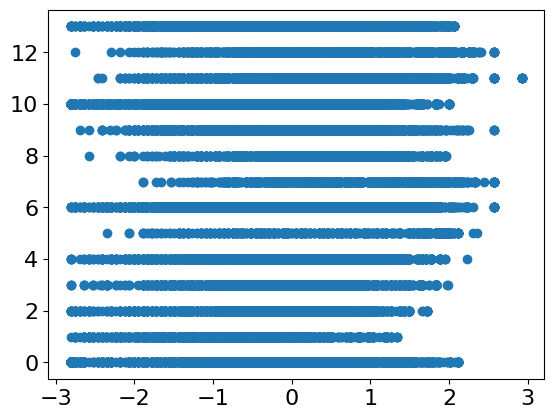

In [ ]:
plt.scatter(X_train_multi.T[0], y_train_multi)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_multi, y_train_multi)

LogisticRegression(random_state=0)

In [ ]:

y_pred_multi = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

Accuracy 0.29592872448404195
F1-score [0.11476842 0.0633694  0.39181649 0.24410333 0.29372334 0.07334963
 0.37199215 0.03939394 0.03526819 0.08211474 0.27049873 0.25557404
 0.22249389 0.40549051]
              precision    recall  f1-score   support

           0       0.19      0.08      0.11      2386
           1       0.25      0.04      0.06      1133
           2       0.36      0.43      0.39      1484
           3       0.27      0.22      0.24      1452
           4       0.23      0.39      0.29      2455
           5       0.33      0.04      0.07       363
           6       0.30      0.49      0.37      3694
           7       0.23      0.02      0.04       604
           8       0.18      0.02      0.04      1229
           9       0.43      0.05      0.08      1608
          10       0.31      0.24      0.27      3313
          11       0.37      0.20      0.26      1953
          12       0.55      0.14      0.22       652
          13       0.31      0.59      0.41    

In [ ]:
# # prompt: Do the hyper parameter tuning and use relvant parametrs with justification for multiclass dataset

# import pandas as pd
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# # ... (Your existing code for data loading and preprocessing) ...

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Regularization type
#     'solver': ['liblinear', 'saga'], # Solvers that support both l1 and l2 penalties
#     'max_iter': [100, 500, 1000] # Increase max_iter if needed
# }

# clf = LogisticRegression(random_state=0, multi_class='multinomial') # Use multinomial for multiclass
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro') # Use 5-fold cross validation and f1-macro scoring
# grid_search.fit(X_train_multi, y_train_multi)


# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Evaluate the model with best hyperparameters on the test set
# best_clf = grid_search.best_estimator_
# y_pred_multi = best_clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
# print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
# print(classification_report(y_test_multi, y_pred_multi))

In [ ]:
clf = LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')


In [ ]:
clf.fit(X_train_multi, y_train_multi)
y_pred_multi = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

Accuracy 0.29619187248599677
F1-score [0.11531741 0.09322034 0.39143921 0.24156039 0.2952979  0.0729927
 0.37268495 0.03945372 0.03240059 0.08206858 0.26900187 0.25441225
 0.22249389 0.40618173]
              precision    recall  f1-score   support

           0       0.19      0.08      0.12      2386
           1       0.23      0.06      0.09      1133
           2       0.36      0.43      0.39      1484
           3       0.27      0.22      0.24      1452
           4       0.24      0.39      0.30      2455
           5       0.31      0.04      0.07       363
           6       0.30      0.49      0.37      3694
           7       0.24      0.02      0.04       604
           8       0.17      0.02      0.03      1229
           9       0.43      0.05      0.08      1608
          10       0.31      0.24      0.27      3313
          11       0.36      0.20      0.25      1953
          12       0.55      0.14      0.22       652
          13       0.31      0.59      0.41     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from scipy.special import expit

## Binary Class Classification

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_bin, y_train_bin)

LogisticRegression(random_state=0)

In [ ]:
# Predict on the test set using the new data
y_pred_bin = clf.predict(X_test_bin) #Removed .T[0].reshape(-1,1) as we are using all features

# Print the performance metrics
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

Accuracy 0.9653396488853803
F1-score [0.98232226 0.11854685]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25705
           1       0.41      0.07      0.12       896

    accuracy                           0.97     26601
   macro avg       0.69      0.53      0.55     26601
weighted avg       0.95      0.97      0.95     26601



In [ ]:
from collections import Counter
from collections import defaultdict
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_bin, y_train_bin)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59974, 1: 59974})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
clf = LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')
clf.fit(X_res, y_res)

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
# Predict on the test set using the new data
y_pred_bin = clf.predict(X_test_bin) #Removed .T[0].reshape(-1,1) as we are using all features

# Print the performance metrics
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

Accuracy 0.8405323108153829
F1-score [0.91046855 0.2713844 ]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     25705
           1       0.16      0.88      0.27       896

    accuracy                           0.84     26601
   macro avg       0.58      0.86      0.59     26601
weighted avg       0.97      0.84      0.89     26601



In [ ]:
df['broad_genre'].unique()

array(['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Dance/Disco',
       'Reggae/Dub'], dtype=object)

# SVM

## Multi-Class

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train_multi, y_train_multi)

y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

Accuracy 0.29619187248599677
F1-score [0.11531741 0.09322034 0.39143921 0.24156039 0.2952979  0.0729927
 0.37268495 0.03945372 0.03240059 0.08206858 0.26900187 0.25441225
 0.22249389 0.40618173]
              precision    recall  f1-score   support

           0       0.19      0.08      0.12      2386
           1       0.23      0.06      0.09      1133
           2       0.36      0.43      0.39      1484
           3       0.27      0.22      0.24      1452
           4       0.24      0.39      0.30      2455
           5       0.31      0.04      0.07       363
           6       0.30      0.49      0.37      3694
           7       0.24      0.02      0.04       604
           8       0.17      0.02      0.03      1229
           9       0.43      0.05      0.08      1608
          10       0.31      0.24      0.27      3313
          11       0.36      0.20      0.25      1953
          12       0.55      0.14      0.22       652
          13       0.31      0.59      0.41     

In [ ]:
# # prompt: Do the Hyper parameter tuning for SVM using Random search cv

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from scipy.stats import uniform, randint

# # Define the parameter distribution for the random search
# param_distributions = {
#     'C': uniform(loc=0.1, scale=10),  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient
#     'degree': randint(2, 5), # Degree for polynomial kernel
# }

# # Create an SVC classifier
# clf = SVC(random_state=42)

# # Create the random search object
# random_search = RandomizedSearchCV(
#     estimator=clf,
#     param_distributions=param_distributions,
#     n_iter=5, # Number of parameter settings that are sampled
#     cv=5, # Number of cross-validation folds
#     scoring='f1_macro', # Scoring metric (you can change this)
#     verbose=1,
#     n_jobs=-1 # Use all available processors
# )


# # Perform the random search
# random_search.fit(X_train_multi, y_train_multi)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", random_search.best_params_)
# print("Best cross-validation score:", random_search.best_score_)

# # Evaluate the best model on the test set
# best_clf = random_search.best_estimator_
# y_pred_multi = best_clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
# print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
# print(classification_report(y_test_multi, y_pred_multi))

In [ ]:
# from sklearn.svm import SVC

# clf = SVC(gamma='auto')
# clf.fit(X_train_multi, y_train_multi)

# y_pred = clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
# print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
# print(classification_report(y_test_multi, y_pred_multi))

In [ ]:
# # prompt: Do the Hyper parameter tuning for SVM

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define the parameter grid for hyperpar ameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
#     'kernel': ['rbf', 'linear', 'poly'] # Kernel type
# }

# # Create an SVC classifier
# svc = SVC(random_state=42)

# # Perform GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro') # Use 5-fold cross validation and f1-macro scoring
# grid_search.fit(X_train_multi, y_train_multi)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Evaluate the model with the best hyperparameters on the test set
# best_svc = grid_search.best_estimator_
# y_pred_multi = best_svc.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
# print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
# print(classification_report(y_test_multi, y_pred_multi))

## Binary Classification

In [ ]:
# clf = SVC(gamma='auto')
# clf.fit(X_res, y_res)

In [ ]:
# # Predict on the test set using the new data
# y_pred_bin = clf.predict(X_test_bin) #Removed .T[0].reshape(-1,1) as we are using all features

# # Print the performance metrics
# print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
# print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
# print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_res, y_res)

LinearSVC(random_state=42)

In [ ]:
# Predict on the test set using the new data
y_pred_bin = clf.predict(X_test_bin) #Removed .T[0].reshape(-1,1) as we are using all features

# Print the performance metrics
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

Accuracy 0.8354573136348258
F1-score [0.90733566 0.26646556]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     25705
           1       0.16      0.89      0.27       896

    accuracy                           0.84     26601
   macro avg       0.58      0.86      0.59     26601
weighted avg       0.97      0.84      0.89     26601



# RandomForrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='sqrt',
                             random_state=0,
                             n_jobs=-1)
clf.fit(X_train_multi, y_train_multi)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

Accuracy 0.29619187248599677
F1-score [0.11531741 0.09322034 0.39143921 0.24156039 0.2952979  0.0729927
 0.37268495 0.03945372 0.03240059 0.08206858 0.26900187 0.25441225
 0.22249389 0.40618173]
              precision    recall  f1-score   support

           0       0.19      0.08      0.12      2386
           1       0.23      0.06      0.09      1133
           2       0.36      0.43      0.39      1484
           3       0.27      0.22      0.24      1452
           4       0.24      0.39      0.30      2455
           5       0.31      0.04      0.07       363
           6       0.30      0.49      0.37      3694
           7       0.24      0.02      0.04       604
           8       0.17      0.02      0.03      1229
           9       0.43      0.05      0.08      1608
          10       0.31      0.24      0.27      3313
          11       0.36      0.20      0.25      1953
          12       0.55      0.14      0.22       652
          13       0.31      0.59      0.41     

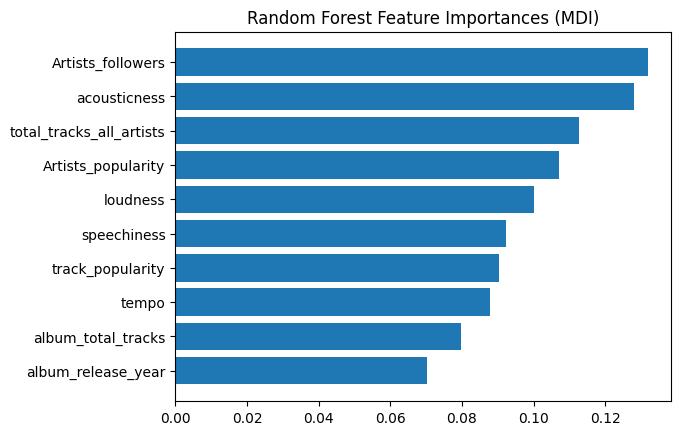

In [ ]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(X_multi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [ ]:
clf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

In [ ]:
df["broad_genre"].unique()

array(['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Dance/Disco',
       'Reggae/Dub'], dtype=object)

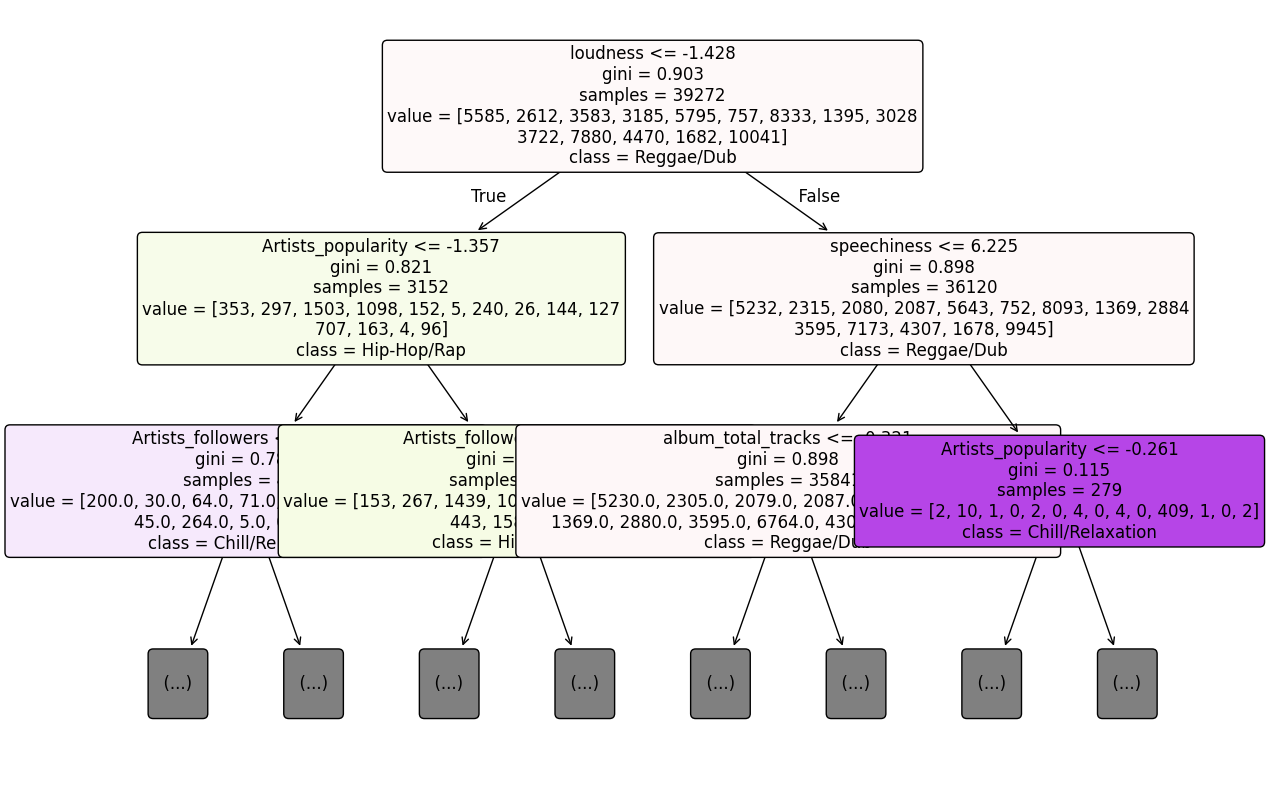

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0],
          feature_names=X_multi.columns,
          class_names=['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Dance/Disco',
       'Reggae/Dub'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=2)
plt.show()

In [ ]:
# permutation_importance(clf, X_test_multi, y_test_multi, n_repeats=2, random_state=42, n_jobs=2)

In [ ]:
# sorted_idx = result.importances_mean.argsort()[-nbr_features:]
# fig, ax = plt.subplots()
# plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(frame.feature_names)[sorted_idx])
# plt.title("Permutation Importances (test set)")
# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train_multi, y_train_multi)
clf = grid_search.best_estimator_


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-6e706721559f>", line 6, in <cell line: 6>
    grid_search.fit(X_train_multi, y_train_multi)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1023, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1570, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 969, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
  

TypeError: object of type 'NoneType' has no len()

In [ ]:
grid_search.best_params_

In [ ]:
clf.get_params()

In [ ]:
y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

## Binary Class Classification

In [ ]:
# prompt: Run the random forrest for binary class classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=0) # Initialize with default parameters
clf.fit(X_train_bin, y_train_bin) # Fit the model on the training data

y_pred_bin = clf.predict(X_test_bin)

print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0) # Initialize with default parameters
clf.fit(X_res, y_res) # Fit the model on the training data

y_pred_bin = clf.predict(X_test_bin)

print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

# ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

## Multi-Class

In [ ]:
# clf = AdaBoostClassifier(estimator=None, n_estimators=100, random_state=0)
# clf.fit(X_train_multi, y_train_multi)

# y_pred = clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred))
# print('F1-score %s' % f1_score(y_test_multi, y_pred, average=None))
# print(classification_report(y_test_multi, y_pred))

In [ ]:
# # prompt: Run Hyperparameter tuning for adaboost

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for AdaBoost
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of weak learners
#     'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
#     # 'algorithm': ['SAMME', 'SAMME.R'] # Algorithm to use. SAMME.R generally performs better
# }

# # Create an AdaBoostClassifier
# clf = AdaBoostClassifier(random_state=0)

# # Perform GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_train_multi, y_train_multi)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred))
# print('F1-score %s' % f1_score(y_test_multi, y_pred, average=None))
# print(classification_report(y_test_multi, y_pred))

In [ ]:
# prompt: run the adaboost for the binary class classification

# Assuming X_train_bin, X_test_bin, y_train_bin, y_test_bin are defined as in your code.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize AdaBoostClassifier with optimized parameters (if any from hyperparameter tuning)
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Train the classifier
clf.fit(X_train_bin, y_train_bin)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
# prompt: use for smote treated data

# Assuming X_res and y_res are from SMOTE as in your code.

clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
clf.fit(X_res, y_res)

y_pred_bin = clf.predict(X_test_bin)

print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
# prompt: do hyper-parameter tuning on the SMOTE treated data

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
}

# Create an AdaBoostClassifier
clf = AdaBoostClassifier(random_state=0)

# Perform GridSearchCV on SMOTE-treated data
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_res, y_res) # Use X_res and y_res (SMOTE data)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
y_pred_bin = best_clf.predict(X_test_bin)

print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

# GB Classifier

## Multi-Class

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train_multi, y_train_multi)

y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred))
print('F1-score %s' % f1_score(y_test_multi, y_pred, average=None))
print(classification_report(y_test_multi, y_pred))

Accuracy 0.36070072553663396
F1-score [0.33793738 0.37493882 0.13213531 0.2234957  0.35318488 0.2226087
 0.48470401 0.20913706 0.29057471 0.35517693 0.32362685 0.24045877
 0.19777778 0.54663156]
              precision    recall  f1-score   support

           0       0.37      0.31      0.34      2386
           1       0.42      0.34      0.37      1133
           2       0.11      0.17      0.13      1484
           3       0.36      0.16      0.22      1452
           4       0.31      0.42      0.35      2455
           5       0.30      0.18      0.22       363
           6       0.47      0.50      0.48      3694
           7       0.27      0.17      0.21       604
           8       0.33      0.26      0.29      1229
           9       0.38      0.34      0.36      1608
          10       0.38      0.28      0.32      3313
          11       0.20      0.31      0.24      1953
          12       0.36      0.14      0.20       652
          13       0.51      0.58      0.55     

In [ ]:
clf = GradientBoostingClassifier(n_estimators=150,
                                 learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train_multi, y_train_multi)
y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred))
print('F1-score %s' % f1_score(y_test_multi, y_pred, average=None))
print(classification_report(y_test_multi, y_pred))

Accuracy 0.36088868839517313
F1-score [0.33954451 0.37395986 0.1321004  0.22392344 0.35346911 0.22222222
 0.48463983 0.20977597 0.28977533 0.35655872 0.32235581 0.23913043
 0.19799778 0.54853248]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34      2386
           1       0.42      0.34      0.37      1133
           2       0.11      0.17      0.13      1484
           3       0.37      0.16      0.22      1452
           4       0.31      0.42      0.35      2455
           5       0.30      0.18      0.22       363
           6       0.47      0.50      0.48      3694
           7       0.27      0.17      0.21       604
           8       0.33      0.26      0.29      1229
           9       0.38      0.34      0.36      1608
          10       0.38      0.28      0.32      3313
          11       0.19      0.31      0.24      1953
          12       0.36      0.14      0.20       652
          13       0.52      0.58      0.55    

In [ ]:
# # prompt: Hyper parameter tuning

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# # Define the parameter grid for Gradient Boosting
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of boosting stages
#     'learning_rate': [0.01, 0.1, 1.0],  # Step size shrinkage
#     'max_depth': [3, 5, 7],  # Maximum depth of individual trees
# }

# # Create a GradientBoostingClassifier
# clf = GradientBoostingClassifier(random_state=0)

# # Perform GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_train_multi, y_train_multi)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test_multi)

# print('Accuracy %s' % accuracy_score(y_test_multi, y_pred))
# print('F1-score %s' % f1_score(y_test_multi, y_pred, average=None))
# print(classification_report(y_test_multi, y_pred))

## Binary-Class

In [ ]:
# prompt: Run the GBC for the binary class

from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier with optimized parameters (if any from hyperparameter tuning)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)

# Train the classifier on the original binary class data
clf.fit(X_train_bin, y_train_bin)


GradientBoostingClassifier(learning_rate=1.0, random_state=0)

In [ ]:
# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))


# Train the classifier on the SMOTE-resampled binary class data
clf.fit(X_res, y_res)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

Accuracy 0.9159806022329987
F1-score [0.95502566 0.36270317]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     25705
           1       0.24      0.71      0.36       896

    accuracy                           0.92     26601
   macro avg       0.62      0.82      0.66     26601
weighted avg       0.96      0.92      0.94     26601

Accuracy 0.957633171685275
F1-score [0.97794736 0.46256557]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     25705
           1       0.40      0.54      0.46       896

    accuracy                           0.96     26601
   macro avg       0.69      0.76      0.72     26601
weighted avg       0.96      0.96      0.96     26601



# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(objective='binary:logistic',
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    reg_lambda = 1,
                    tree_method='exact', # 'approx'
                    use_label_encoder=False,
                    random_state=42
                   )
clf.fit(X_train_multi, y_train_multi)

y_pred = clf.predict(X_test_multi)

print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy 0.29619187248599677
F1-score [0.11531741 0.09322034 0.39143921 0.24156039 0.2952979  0.0729927
 0.37268495 0.03945372 0.03240059 0.08206858 0.26900187 0.25441225
 0.22249389 0.40618173]
              precision    recall  f1-score   support

           0       0.19      0.08      0.12      2386
           1       0.23      0.06      0.09      1133
           2       0.36      0.43      0.39      1484
           3       0.27      0.22      0.24      1452
           4       0.24      0.39      0.30      2455
           5       0.31      0.04      0.07       363
           6       0.30      0.49      0.37      3694
           7       0.24      0.02      0.04       604
           8       0.17      0.02      0.03      1229
           9       0.43      0.05      0.08      1608
          10       0.31      0.24      0.27      3313
          11       0.36      0.20      0.25      1953
          12       0.55      0.14      0.22       652
          13       0.31      0.59      0.41     

## XGB binary

In [ ]:
# prompt: Use XGB on binary class

from xgboost import XGBClassifier

# Initialize XGBoost classifier for binary classification
clf = XGBClassifier(objective='binary:logistic',
                    use_label_encoder=False,
                    eval_metric='logloss', # Use appropriate eval metric
                    random_state=42)

# Train the classifier on the original binary class data
clf.fit(X_train_bin, y_train_bin)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))


# Train the classifier on the SMOTE-resampled binary class data
clf.fit(X_res, y_res)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:10:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy 0.9713168677869253
F1-score [0.98527055 0.45538901]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     25705
           1       0.63      0.36      0.46       896

    accuracy                           0.97     26601
   macro avg       0.80      0.67      0.72     26601
weighted avg       0.97      0.97      0.97     26601



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:10:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy 0.9576707642569828
F1-score [0.97790337 0.49821747]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     25705
           1       0.41      0.62      0.50       896

    accuracy                           0.96     26601
   macro avg       0.70      0.80      0.74     26601
weighted avg       0.97      0.96      0.96     26601



# Neural Networks

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# prompt: Implement MLPClassifier on multi-class

from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), # Example hidden layer sizes, adjust as needed
                    activation='relu', # Activation function
                    solver='adam', # Solver for weight optimization
                    alpha=0.0001, # L2 regularization term
                    batch_size='auto', # Size of minibatches for stochastic optimizers
                    learning_rate='constant', # Learning rate schedule
                    learning_rate_init=0.001, # The initial learning rate
                    power_t=0.5, # The exponent for inverse scaling learning rate
                    max_iter=200, # Maximum number of iterations
                    shuffle=True, # Whether to shuffle samples in each iteration
                    random_state=None, # Determines random number generation for weights
                    tol=0.0001, # Tolerance for optimization
                    verbose=False, # Whether to print progress messages to stdout
                    warm_start=False, # When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
                    momentum=0.9, # Momentum for gradient descent update
                    nesterovs_momentum=True, # Whether to use Nesterov's momentum
                    early_stopping=False, # Whether to use early stopping to terminate training when validation score is not improving
                    validation_fraction=0.1, # The proportion of training data to set aside as validation set for early stopping
                    beta_1=0.9, # Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1).
                    beta_2=0.999, # Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1).
                    epsilon=1e-08, # Value for numerical stability in adam
                    n_iter_no_change=10, # Maximum number of epochs to not meet tol improvement
                    max_fun=15000) # Only used when solver='lbfgs'

# Train the classifier
clf.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = clf.predict(X_test_multi)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'accuracy_score' is not defined

In [ ]:
# prompt: Implement MLPClassifier on multi-class

from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
clf = MLPClassifier(random_state=0)

# Train the classifier
clf.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = clf.predict(X_test_multi)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_multi, y_pred_multi))
print('F1-score %s' % f1_score(y_test_multi, y_pred_multi, average=None))
print(classification_report(y_test_multi, y_pred_multi))

Accuracy 0.44663734446073455
F1-score [0.38294866 0.43602362 0.52292441 0.39288538 0.42255558 0.33628319
 0.50172499 0.30880829 0.31531076 0.37736967 0.43551034 0.40817396
 0.23174971 0.54372084]
              precision    recall  f1-score   support

           0       0.44      0.34      0.38      2386
           1       0.49      0.39      0.44      1133
           2       0.48      0.57      0.52      1484
           3       0.46      0.34      0.39      1452
           4       0.38      0.48      0.42      2455
           5       0.47      0.26      0.34       363
           6       0.46      0.55      0.50      3694
           7       0.41      0.25      0.31       604
           8       0.42      0.25      0.32      1229
           9       0.36      0.40      0.38      1608
          10       0.48      0.40      0.44      3313
          11       0.42      0.40      0.41      1953
          12       0.47      0.15      0.23       652
          13       0.48      0.63      0.54    

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# prompt: implement MLP on binary

from sklearn.neural_network import MLPClassifier

# Assuming X_train_bin, X_test_bin, y_train_bin, y_test_bin are defined

# Initialize the MLPClassifier for binary classification
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=0) # Adjust parameters as needed

# Train the classifier on the original binary class data
clf.fit(X_train_bin, y_train_bin)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))


Accuracy 0.9695876094883651
F1-score [0.98439038 0.41163636]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     25705
           1       0.59      0.32      0.41       896

    accuracy                           0.97     26601
   macro avg       0.78      0.65      0.70     26601
weighted avg       0.96      0.97      0.97     26601



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Train the classifier on the SMOTE-resampled binary class data
clf.fit(X_res, y_res)

# Predict on the test set
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the model
print('Accuracy %s' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-score %s' % f1_score(y_test_bin, y_pred_bin, average=None))
print(classification_report(y_test_bin, y_pred_bin))

Accuracy 0.8977857975264087
F1-score [0.9445385  0.34905435]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     25705
           1       0.22      0.81      0.35       896

    accuracy                           0.90     26601
   macro avg       0.61      0.86      0.65     26601
weighted avg       0.97      0.90      0.92     26601



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
rscv = RandomizedSearchCV(MLPClassifier(), param_distributions={
    'hidden_layer_sizes': [(128, 64, 32), (128, 32), (64, 32), (100, 100, 100)],
    'alpha': [0.1, 0.01, 0.001, 0.002]
})

rscv.fit(X_train_bin, y_train_bin)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'alpha': [0.1, 0.01, 0.001, 0.002],
                                        'hidden_layer_sizes': [(128, 64, 32),
                                                               (128, 32),
                                                               (64, 32),
                                                               (100, 100,
                                                                100)]})

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

# Keras

In [ ]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
n_classes = 2
def build_model():

    n_feature = X_train_bin.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
model1 = build_model()
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(X_train_bin, y_train_bin, epochs=50, batch_size=32).history

Epoch 1/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9708 - loss: 0.0787
Epoch 2/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9698 - loss: 0.0795
Epoch 3/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9705 - loss: 0.0777
Epoch 4/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9700 - loss: 0.0783
Epoch 5/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9711 - loss: 0.0753
Epoch 6/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9714 - loss: 0.0758
Epoch 7/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9718 - loss: 0.0725
Epoch 8/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9721 - loss: 0.0716
Epoch 9/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9719 - loss: 0.0731
Epoch 10/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9705 - loss: 0.0735
Epoch 11/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.0709
Epoch 12/50
1940/1940 ━━━━━━━━

In [ ]:
history1

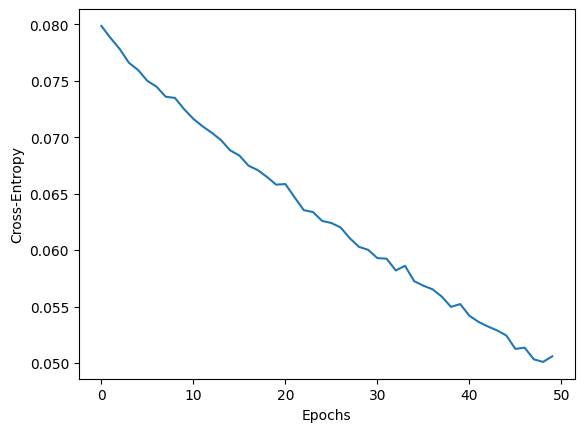

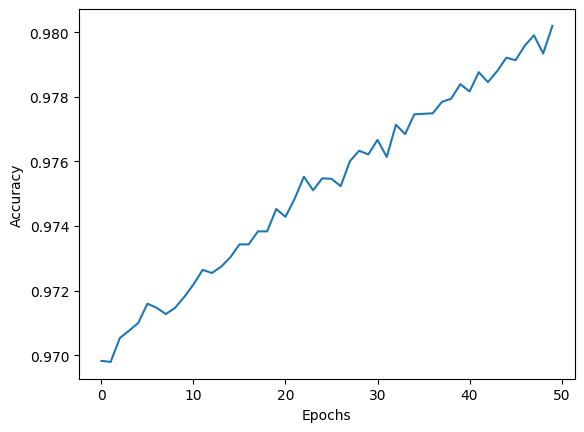

In [ ]:
plt.plot(history1['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()
plt.plot(history1['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# prompt: Change the keras sequential model code for the smote treated data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_classes = 2
def build_model():
    n_feature = X_res.shape[1] # Use X_res shape for SMOTE data
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8843 - loss: 0.2844
Epoch 2/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9159 - loss: 0.2173
Epoch 3/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9218 - loss: 0.2015
Epoch 4/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9314 - loss: 0.1840
Epoch 5/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9342 - loss: 0.1761
Epoch 6/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9393 - loss: 0.1671
Epoch 7/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9442 - loss: 0.1572
Epoch 8/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9456 - loss: 0.1533
Epoch 9/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9493 - loss: 0.1452
Epoch 10/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9517 - loss: 0.1383
Epoch 11/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9533 - loss: 0.1360
Epoch 12/50
3749/3749 ━━━

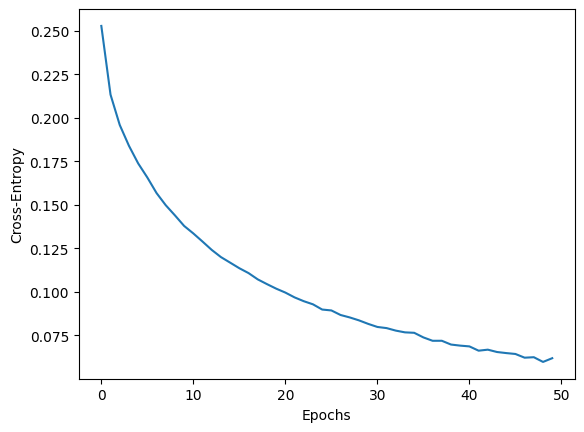

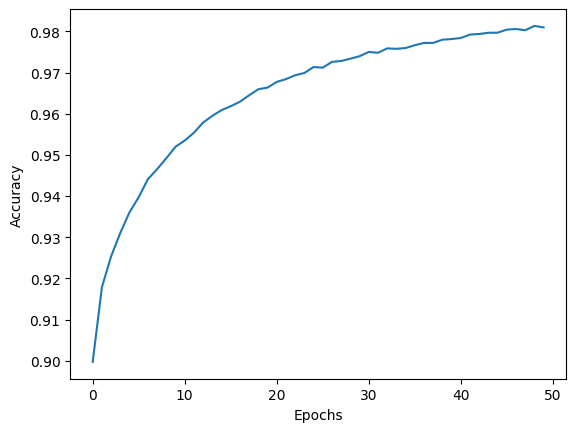

In [ ]:
model1 = build_model()
model1.summary()
history1 = model1.fit(X_res, y_res, epochs=50, batch_size=32).history # Use X_res and y_res

plt.plot(history1['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()

plt.plot(history1['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Improved Architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    n_feature = X_res.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid

    model.compile(loss='binary_crossentropy', # Changed loss function
                  optimizer='adam',
                  metrics=['accuracy', 'precision', 'recall', 'AUC'])  # Added metrics
    return model

model1 = build_model()
history1 = model1.fit(X_res, y_res, epochs=50, batch_size=32,validation_data=(X_test_bin, y_test_bin)).history

Epoch 1/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.9410 - accuracy: 0.8844 - loss: 0.2865 - precision: 0.8513 - recall: 0.9322 - val_AUC: 0.9447 - val_accuracy: 0.8576 - val_loss: 0.2903 - val_precision: 0.1790 - val_recall: 0.8996
Epoch 2/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.9618 - accuracy: 0.9123 - loss: 0.2215 - precision: 0.8774 - recall: 0.9579 - val_AUC: 0.9389 - val_accuracy: 0.8800 - val_loss: 0.2596 - val_precision: 0.2004 - val_recall: 0.8571
Epoch 3/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9672 - accuracy: 0.9219 - loss: 0.2031 - precision: 0.8891 - recall: 0.9643 - val_AUC: 0.9449 - val_accuracy: 0.8709 - val_loss: 0.2868 - val_precision: 0.1912 - val_recall: 0.8772
Epoch 4/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.9707 - accuracy: 0.9266 - loss: 0.1912 - precision: 0.8952 - recall: 0.9662 - val_AUC: 0.9424 - val_accuracy: 0.8842 - val_loss: 0.2566 - val_precision: 0.2045 - val_recall: 0.8438
Epoch 5/50
3749/3749

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    n_feature = X_train_bin.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid

    model.compile(loss='binary_crossentropy', # Changed loss function
                  optimizer='adam',
                  metrics=['accuracy', 'precision', 'recall', 'AUC'])  # Added metrics
    return model

model2 = build_model()
history2 = model2.fit(X_train_bin, y_train_bin,
                    epochs=50, batch_size=32,
                    validation_data=(X_test_bin, y_test_bin)).history # Use validation_data

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.8363 - accuracy: 0.9554 - loss: 0.1380 - precision: 0.1445 - recall: 0.0300 - val_AUC: 0.9314 - val_accuracy: 0.9668 - val_loss: 0.0922 - val_precision: 0.6458 - val_recall: 0.0346
Epoch 2/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9314 - accuracy: 0.9669 - loss: 0.0911 - precision: 0.5178 - recall: 0.0679 - val_AUC: 0.9375 - val_accuracy: 0.9677 - val_loss: 0.0904 - val_precision: 0.5678 - val_recall: 0.1730
Epoch 3/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.9390 - accuracy: 0.9685 - loss: 0.0878 - precision: 0.6515 - recall: 0.1259 - val_AUC: 0.9402 - val_accuracy: 0.9687 - val_loss: 0.0868 - val_precision: 0.6307 - val_recall: 0.1696
Epoch 4/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9420 - accuracy: 0.9687 - loss: 0.0840 - precision: 0.5898 - recall: 0.1501 - val_AUC: 0.9401 - val_accuracy: 0.9687 - val_loss: 0.0863 - val_precision: 0.6798 - val_recall: 0.1350
Epoch 5/50
1940/1940 

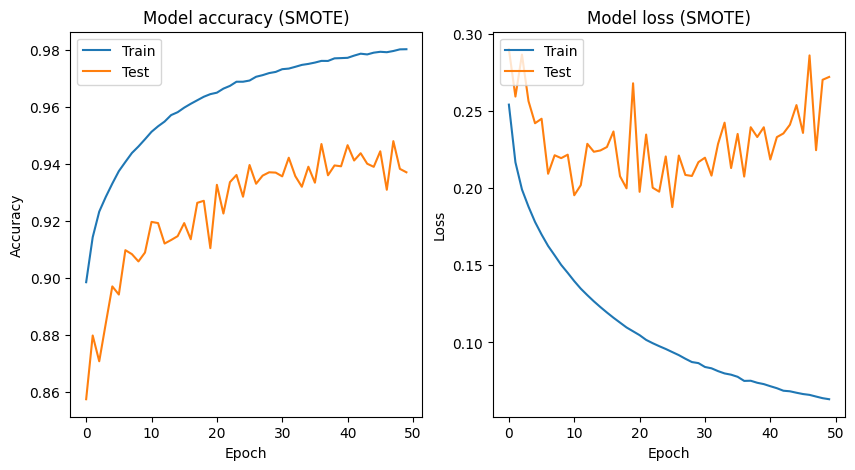

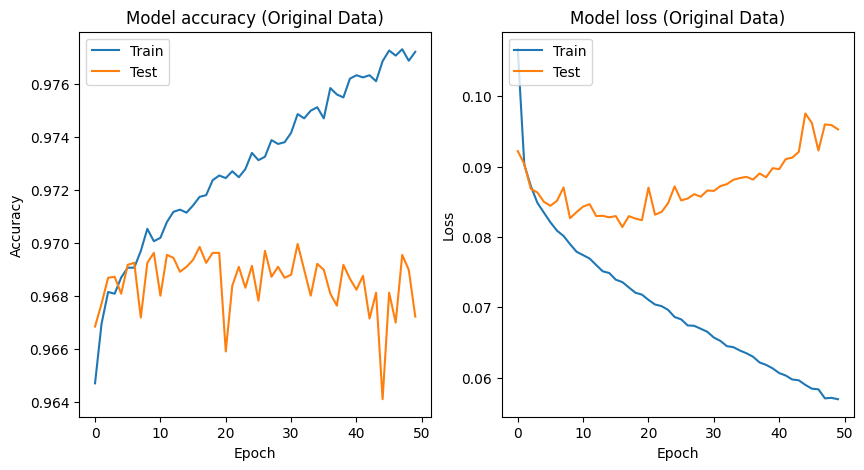

In [ ]:
# prompt: generate  graphs for history 1 which is SMOTE treated data and history 2 which is original binary data

import matplotlib.pyplot as plt

# Assuming history1 and history2 are defined from your Keras model training

# Plot training & validation accuracy values for history1 (SMOTE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model accuracy (SMOTE)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for history1 (SMOTE)
plt.subplot(1, 2, 2)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model loss (SMOTE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values for history2 (original data)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2['accuracy'])
plt.plot(history2['val_accuracy'])
plt.title('Model accuracy (Original Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for history2 (original data)
plt.subplot(1, 2, 2)
plt.plot(history2['loss'])
plt.plot(history2['val_loss'])
plt.title('Model loss (Original Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# prompt: Implement a CNN on multi class classfiication and explain the choices of layers, etc. X_train_mutlti, etc. are my multi class data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout # Removed Conv2D, MaxPooling2D as they are not suitable for tabular data

# Assuming X_train_mutlti is a NumPy array with shape (num_samples, num_features)
# and y_train_multi is a NumPy array with shape (num_samples,) representing class labels

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# No need to reshape data as it's already tabular

def build_nn_model(input_shape, num_classes): # Changed function name to reflect it's a general NN
    """Builds a Neural Network model for multi-class classification of tabular data.

    Args:
        input_shape: Tuple representing the input data shape (num_features,).
        num_classes: The number of output classes.

    Returns:
        A compiled Keras NN model.
    """
    model = Sequential()

    # Input Layer
    model.add(Dense(128, activation='relu', input_shape=input_shape))  # First hidden layer with 128 units

    # Hidden Layers
    model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 units
    model.add(Dropout(0.5)) # Dropout for regularization to prevent overfitting

    # Output Layer
    model.add(Dense(num_classes, activation='softmax')) # Output layer with softmax for multi-class

    # Compile the model: Define loss function, optimizer, and metrics.
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use for integer labels
                  metrics=['accuracy'])
    return model

# Example usage:
input_shape = (X_train_multi.shape[1],) # Input shape is (num_features,)
num_classes = len(np.unique(y_train_multi))  # Get the number of classes from the labels
model = build_nn_model(input_shape, num_classes) # Using the NN model building function
model.summary()

# Train the model
history = model.fit(X_train_multi, y_train_multi, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_multi, y_test_multi, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Num GPUs Available:  0


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 14)                  │             910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,574 (41.30 KB)

 Trainable params: 10,574 (41.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2446 - loss: 2.2662 - val_accuracy: 0.3175 - val_loss: 2.0163
Epoch 2/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3100 - loss: 2.0644 - val_accuracy: 0.3547 - val_loss: 1.9367
Epoch 3/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3359 - loss: 1.9960 - val_accuracy: 0.3615 - val_loss: 1.8941
Epoch 4/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3489 - loss: 1.9634 - val_accuracy: 0.3728 - val_loss: 1.8659
Epoch 5/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3528 - loss: 1.9441 - val_accuracy: 0.3831 - val_loss: 1.8433
Epoch 6/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3614 - loss: 1.9254 - val_accuracy: 0.3866 - val_loss: 1.8273
Epoch 7/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3650 - loss: 1.9088 - val_accuracy: 0.3949 - val_loss: 1.8116
Epoch 8/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3724 - loss: 1.8846 -

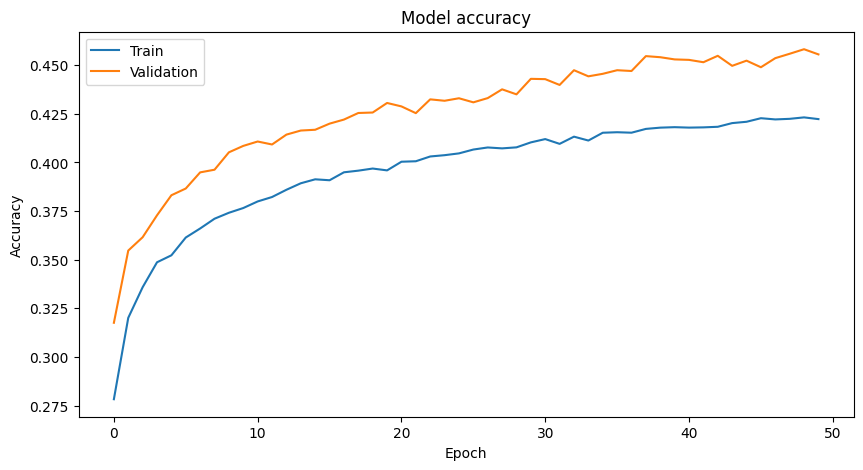

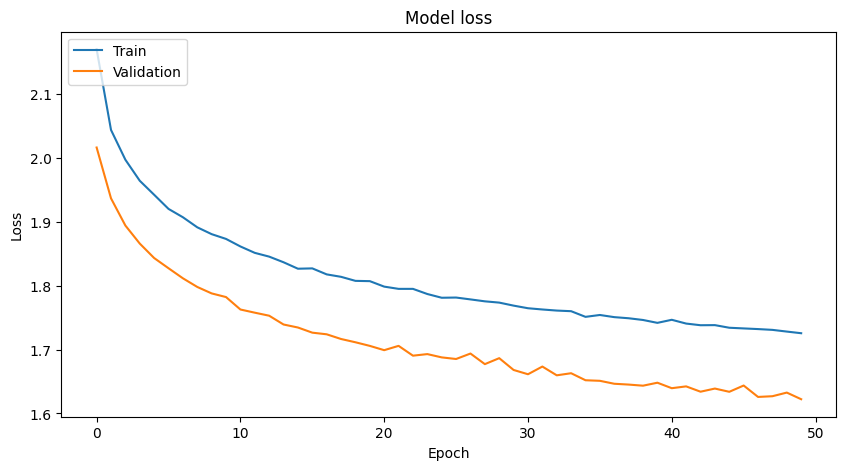

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy']) # Access history data using history.history
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss']) # Access history data using history.history
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv1D, MaxPooling1D  # Import necessary layers

def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Reshape input for Conv1D
    model.add(keras.layers.Reshape((input_shape[0], 1), input_shape=input_shape))

    # Convolutional layers
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flatten for Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example usage
input_shape = (X_train_multi.shape[1],)
num_classes = len(np.unique(y_train_multi))
model = build_cnn_model(input_shape, num_classes)

In [ ]:
model.summary()

# Train the model
history = model.fit(X_train_multi, y_train_multi, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_multi, y_test_multi, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,446 (72.05 KB)

 Trainable params: 18,446 (72.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2452 - loss: 2.2653 - val_accuracy: 0.3234 - val_loss: 2.0156
Epoch 2/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3170 - loss: 2.0586 - val_accuracy: 0.3446 - val_loss: 1.9551
Epoch 3/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3291 - loss: 2.0092 - val_accuracy: 0.3519 - val_loss: 1.9243
Epoch 4/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3430 - loss: 1.9813 - val_accuracy: 0.3669 - val_loss: 1.8869
Epoch 5/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3477 - loss: 1.9514 - val_accuracy: 0.3687 - val_loss: 1.8721
Epoch 6/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3542 - loss: 1.9341 - val_accuracy: 0.3805 - val_loss: 1.8539
Epoch 7/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3531 - loss: 1.9325 - val_accuracy: 0.3786 - val_loss: 1.8418
Epoch 8/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3648 - loss: 1.90

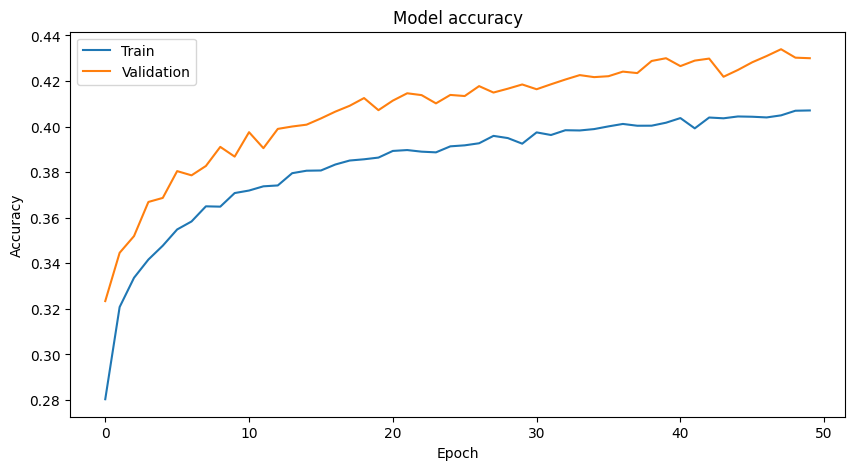

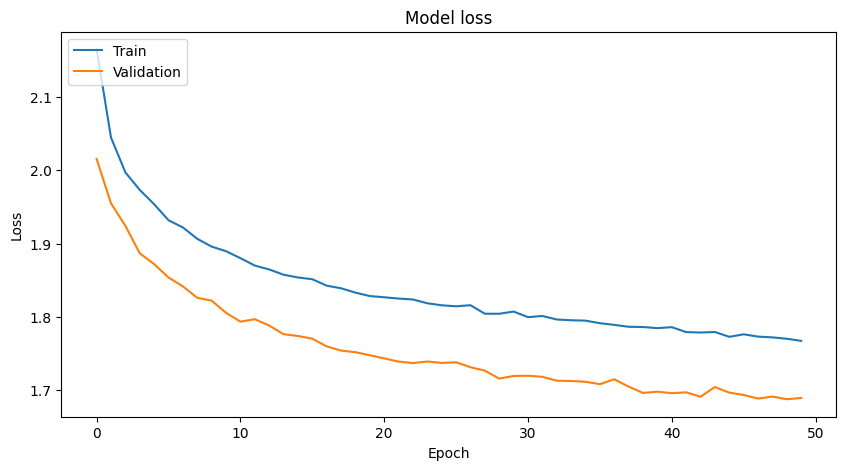

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy']) # Access history data using history.history
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss']) # Access history data using history.history
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Advance Regression

## Data Preperation

In [ ]:
selected_features_reg=['Artists_popularity',
 'Artists_followers',
 'total_tracks_all_artists',
 'album_release_year',
 'album_total_tracks',
 'loudness',
 'acousticness',
 'tempo',
 'speechiness']

In [ ]:
X_reg = df[selected_features_reg]  # Using the same features as multi-class
y_reg = df['track_popularity']  # Target variable

# Split into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=100
)

# Scale the features (important for many regression models)
scl = StandardScaler()
X_train_reg = scl.fit_transform(X_train_reg)
X_test_reg = scl.transform(X_test_reg)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
reg_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 135.29652089609544
R-squared: 0.7074245203553295


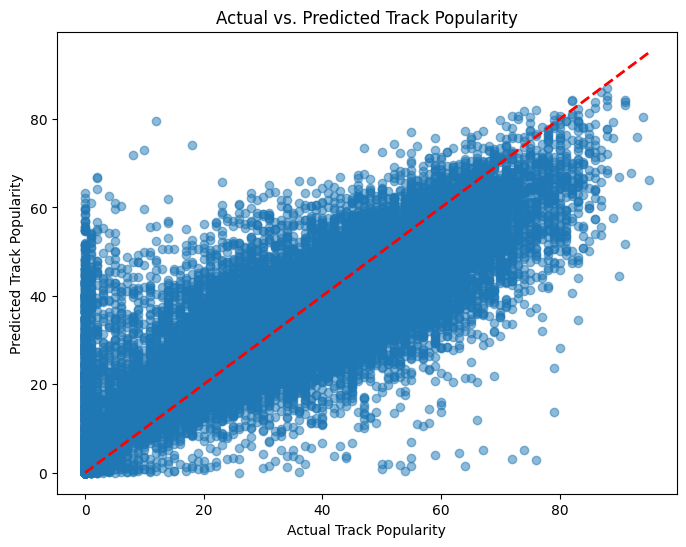

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)  # Alpha for transparency
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")

plt.show()

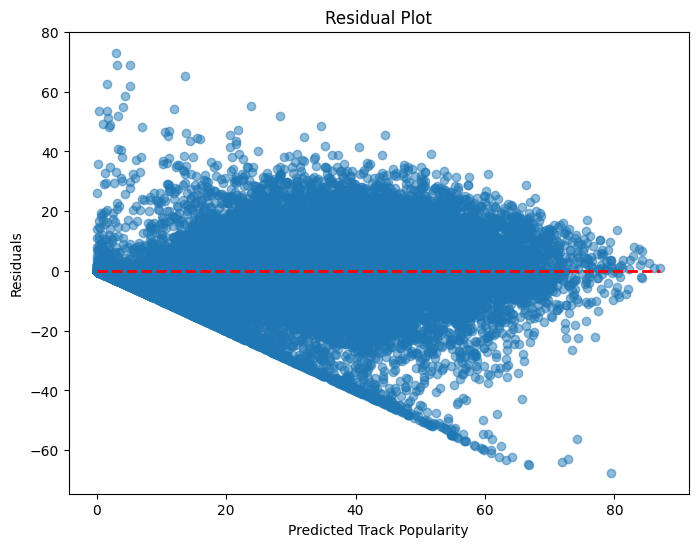

In [ ]:
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_reg.min(), xmax=y_pred_reg.max(), colors='r', linestyles='--', lw=2)
plt.xlabel("Predicted Track Popularity")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

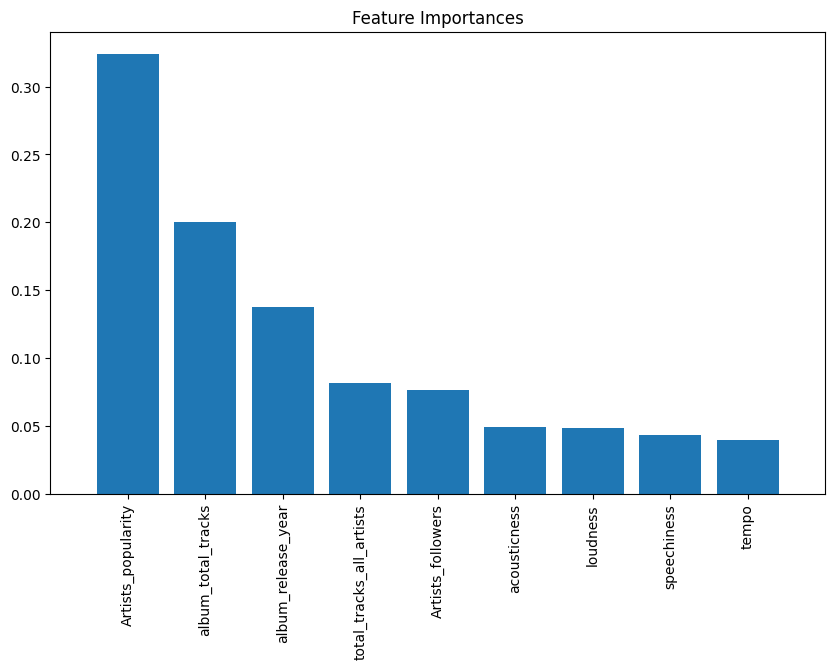

In [ ]:
importances = reg_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_reg.shape[1]), importances[indices], align="center")
plt.xticks(range(X_reg.shape[1]), X_reg.columns[indices], rotation=90)
plt.xlim([-1, X_reg.shape[1]])
plt.show()

In [ ]:
# prompt: Run XGboot Regressor

# Assuming you have already defined X_train_reg, X_test_reg, y_train_reg, y_test_reg
from xgboost import XGBRegressor

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = xgb_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (XGBoost): {mse}")
print(f"R-squared (XGBoost): {r2}")

Mean Squared Error (XGBoost): 156.39906311035156
R-squared (XGBoost): 0.6617907881736755


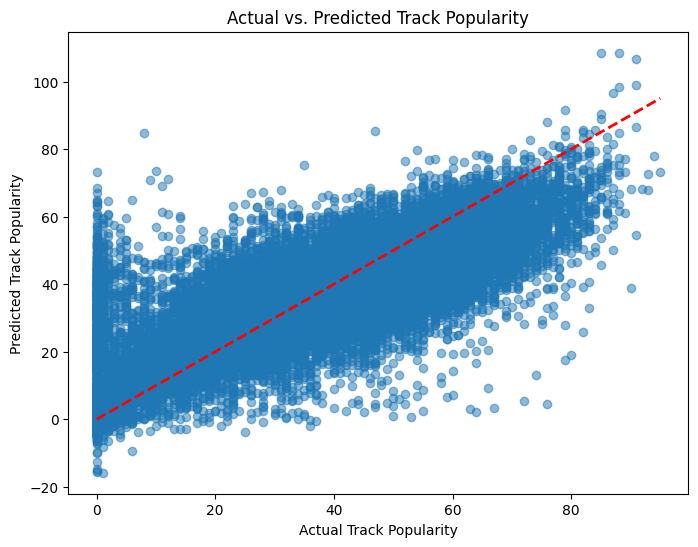

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)  # Alpha for transparency
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")

plt.show()

In [ ]:
# prompt: Run another advance regressor Gradient Boost regressor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = gbr_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (Gradient Boosting): {mse}")
print(f"R-squared (Gradient Boosting): {r2}")

# ... (rest of your evaluation code, plotting, etc.)

Mean Squared Error (Gradient Boosting): 180.0517408185411
R-squared (Gradient Boosting): 0.6106424312913517


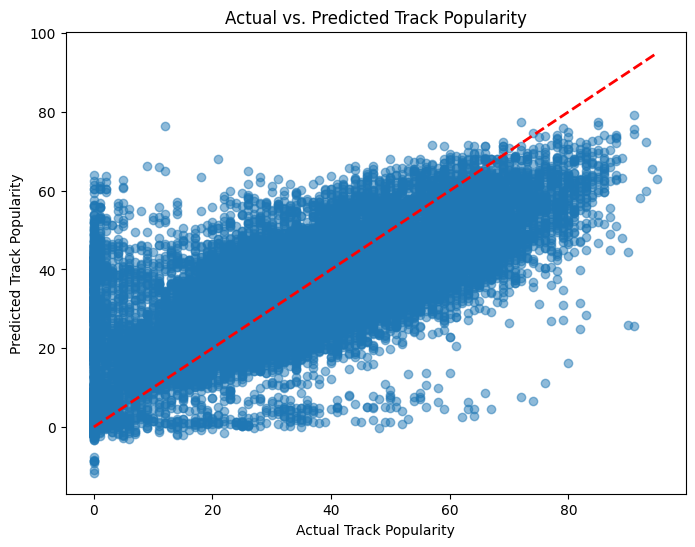

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)  # Alpha for transparency
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")

plt.show()

# Explainable AI

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a0f685eb516a95c6065d7beaf6a22d874f5c6f28507b1dfab4b305f217d148e3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bb = RandomForestClassifier(n_estimators=20, random_state=42)
bb.fit(X_train_bin, y_train_bin)

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score # Import accuracy_score and f1_score

y_pred_bin = bb_predict(X_test_bin)

print('Accuracy %.3f' % accuracy_score(y_test_bin, y_pred_bin))
print('F1-measure %.3f' % f1_score(y_test_bin, y_pred_bin))

Accuracy 0.971
F1-measure 0.375


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
selected_features_bin

['Artists_popularity',
 'Artists_followers',
 'total_tracks_all_artists',
 'album_release_year',
 'album_total_tracks',
 'genre',
 'loudness',
 'acousticness',
 'tempo',
 'speechiness']

In [ ]:
# prompt: lime_explainer = LimeTabularExplainer(
#     X_train_bin,
#     feature_names=feature_names,
#     class_names=[str(v) for v in class_values],
#     discretize_continuous=False
# )
# Use this code for binary class data

from lime.lime_tabular import LimeTabularExplainer

# Assuming X_train_bin, feature_names, and class_values are defined

lime_explainer = LimeTabularExplainer(
    X_train_bin,
    feature_names=selected_features_bin,
    class_names=[str(v) for v in ['Not Popular', "Popular"]],
    discretize_continuous=False
)

In [ ]:
exp = lime_explainer.explain_instance(X_test_bin[25], bb_predict_proba)

In [ ]:
exp.local_exp

{1: [(0, 0.083051640715841),
  (2, -0.04621352631595793),
  (1, 0.035276602169665196),
  (3, -0.023676254367996283),
  (4, -0.017777556848515178),
  (6, 0.015153671690461433),
  (9, -0.012878471636231292),
  (7, -0.009933364234604568),
  (8, -0.0057361254079476886),
  (5, -0.0033436446660447088)]}

In [ ]:
exp.show_in_notebook()

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
i2e = 25
x = X_test_bin[i2e]
x

array([ 1.02943584,  0.18964342, -0.17367492,  0.16524366,  0.06821519,
        0.11771198,  0.65271573, -0.95825201,  0.52357316, -0.40222168])

In [ ]:
f = lambda x: bb_predict_proba(x)[:, 1]
med = np.median(X_train_bin, axis=0).reshape((1, X_train_bin.shape[1]))

shap_explainer = shap.KernelExplainer(f, med)

In [ ]:
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)

In [ ]:
shap.initjs()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
shap_values_single

array([ 0.18537728, -0.05943682,  0.00056254,  0.0138502 , -0.05934383,
       -0.05465295, -0.00532268,  0.01057148, -0.02219024, -0.00941497])

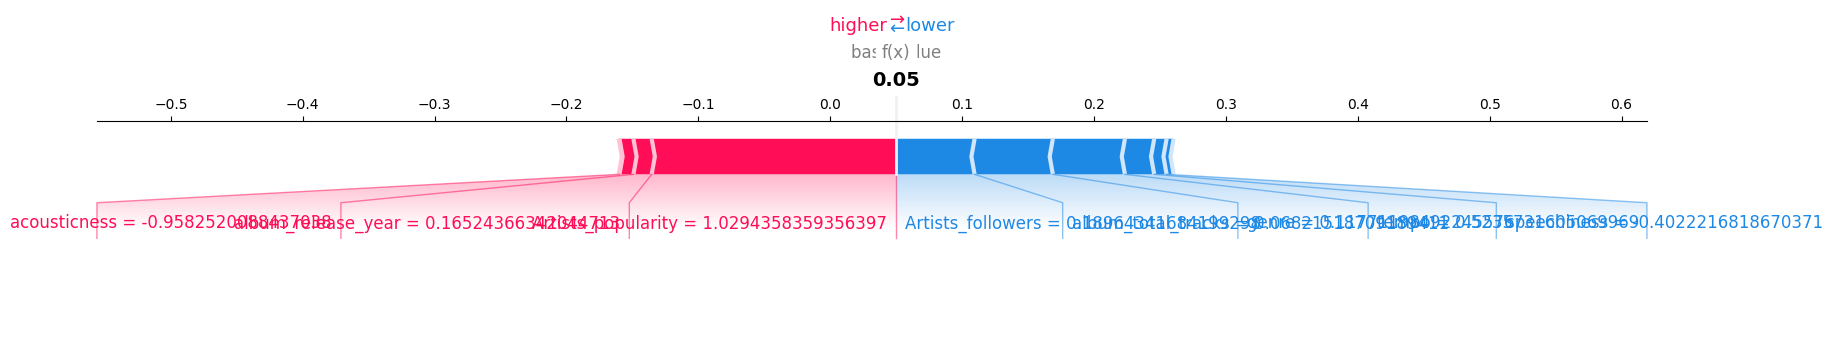

In [ ]:
shap.force_plot(shap_explainer.expected_value, shap_values_single, features=x, feature_names=selected_features_bin,matplotlib=True)